In [1]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

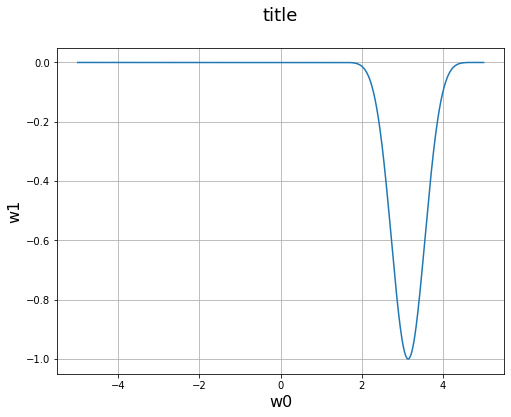

In [32]:
#creating the function and plotting it 

function = lambda x, y: -np.cos(x) * np.cos(x) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2))

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratily chosen to ensure steep curve)
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

x_axis, y_axis = np.meshgrid(x, y)

#Plot the curve
font_s = 16
plt.figure(figsize=(8, 6))

plt.title('title\n', fontsize=font_s + 2)
plt.plot(x, function(x, y))

plt.xlabel('w0', fontsize=font_s)
plt.ylabel('w1', fontsize=font_s)

plt.grid()
plt.show()

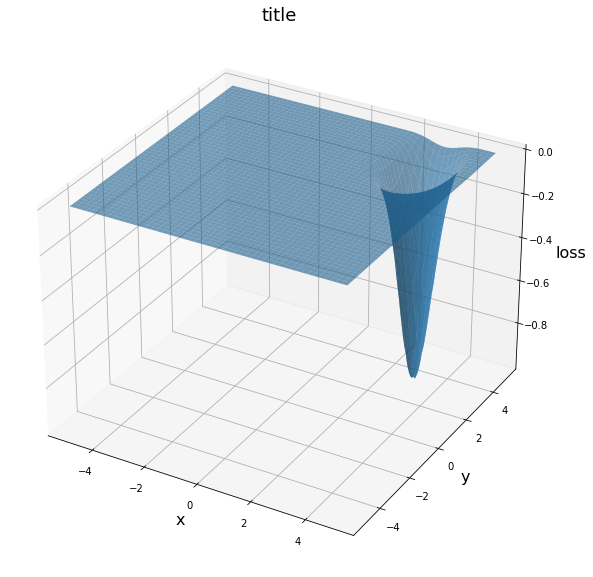

In [24]:
font_s = 16    

# background
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(projection = '3d')


# function body
ax.plot_surface(x_axis, 
                y_axis, 
                function(x_axis, y_axis), 
                alpha = 0.6)

ax.set_title('title', fontsize=font_s + 2)

ax.set_xlabel('x', fontsize=font_s)
ax.set_ylabel('y', fontsize=font_s)
ax.set_zlabel('loss', fontsize=font_s)

ax.zaxis.labelpad = 10

plt.show()

In [41]:
def deriv(x, y):
    grad_w0 = -(-2 * x + 2 * np.pi) * np.exp((-(x - np.pi) ** 2 - (y - np.pi) ** 2)) * \
                                   np.cos(x) ** 2 + 2 * np.exp(-(x - np.pi) ** 2 - (y - np.pi) ** 2) * \
                                   np.sin(x) * np.cos(x)

    grad_w1 = -(-2 * y + 2 * np.pi) * np.exp(-(x - np.pi) ** 2 - (y - np.pi) ** 2) * np.cos(x) ** 2
    
    return np.array([grad_w0, grad_w1])

In [47]:
def adam_optimizer(x, y, x_new, x_prev, precision, l_r, beta1, beta2, epsilon):
    
    # create empty lists where the updated values of x and y will be appended during each iteration
    
    x_list, y_list = [x_new], [function(x_new, y)]
    
    #initialize the G.D with Momentum, RMS prop, and count values. 
    vd_x = 0
    sd_x = 0
    
    # Count Value initialized to 1 to prevent zero division in bias correction
    t = 1
    
    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:
        
        x_prev = x_new
        
        d_x = - deriv(x_prev, y)
        vd_x = beta1 * vd_x + ((1-beta1) * d_x)
            
        sd_x = beta2 * sd_x + ((1-beta2) * (d_x * d_x))
        
        vd_x = vd_x / (1-(beta1)**t)
        sd_x = sd_x / (1-(beta2)**t)
        
        nd_x = vd_x / np.sqrt(sd_x + epsilon)
        
        x_new = x_prev + (l_r * nd_x)
        
        x_list.append(x_new)
        y_list.append(function(x_new, y))
        
        t+=1
        
    # Print the local minimum and number of steps
    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    # Plot the steps taken by th eadam optimzer
    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Adam Optimizer")
    plt.show()

    #print the zoomed in adam steps. 
    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Zoomed in Adam to Key Area")
    plt.show()

Local minimum occurs at: 0
Number of steps: 1


ValueError: x and y must be the same size

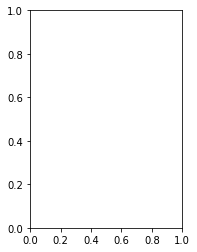

In [48]:
adam_optimizer(x, y, 0, 0, 0.001, 0.6, 0.9, 0.99, 10**-8)

In [57]:
x_axis = np.linspace(-5, 5, 1000)
y_axis = np.linspace(-5, 5, 1000)

In [71]:
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

def func(x, y):
    return -np.cos(x) * np.cos(x) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2))

def grad_func(x, y, w):
    partial_x = -(-2 * x + 2 * np.pi) * np.exp((-(x - np.pi) ** 2 - (y - np.pi) ** 2)) * \
                np.cos(x) ** 2 + 2 * np.exp(-(x - np.pi) ** 2 - (y - np.pi) ** 2) * \
                np.sin(x) * np.cos(x)

    partial_y = -(-2 * y + 2 * np.pi) * np.exp(-(x - np.pi) ** 2 - (y - np.pi) ** 2) * np.cos(x) ** 2
    
    y_hat = partial_x @ w
    error = partial_x.T @ partial_y - partial_x.T @ partial_y
    grad = (2 / len(partial_x)) * error
    mse = (error ** 2).mean()

    return grad, mse

x = 0
y = 0
w = 0
m_t = 0 
v_t = 0 
t = 1

max_iters = 200

while t <= max_iters:
    g_t = grad_func(x, y, w)
    
    m_t = beta_1 * m_t + (1 - beta_1) * g_t
    v_t = beta_2 * v_t + (1 - beta_2) * (g_t * g_t)
    
    m_cap = m_t / (1 - (beta_1 ** t))
    v_cap = v_t / (1 - (beta_2 ** t))
    
    theta_0_prev = w
    w = theta_0 - (alpha * m_cap) / (np.sqrt(v_cap) + epsilon)
    
    if (w[0] == theta_0_prev[0]) and (w[1] == theta_0_prev[1]):
        print('oops')
    
    print(g_t)
    
    t += 1

TypeError: unsupported operand type(s) for @: 'numpy.float64' and 'int'